<a href="https://colab.research.google.com/github/bhawnakapoor/Zennovate/blob/main/Copy_of_Llava_demo_4bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Llava: a large multi-modal model on Google Colab

Run Llava model on a Google Colab!

Llava is a multi-modal image-text to text model that can be seen as an "open source version of GPT4". It yields to very nice results as we will see in this Google Colab demo.

![image/png](https://cdn-uploads.huggingface.co/production/uploads/62441d1d9fdefb55a0b7d12c/FPshq08TKYD0e-qwPLDVO.png)

The architecutre is a pure decoder-based text model that takes concatenated vision hidden states with text hidden states.

We will leverage QLoRA quantization method and use `pipeline` to run our model.

In [ ]:
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

## Load an image

Let's use the image that has been used for Llava demo

And ask the model to describe that image!

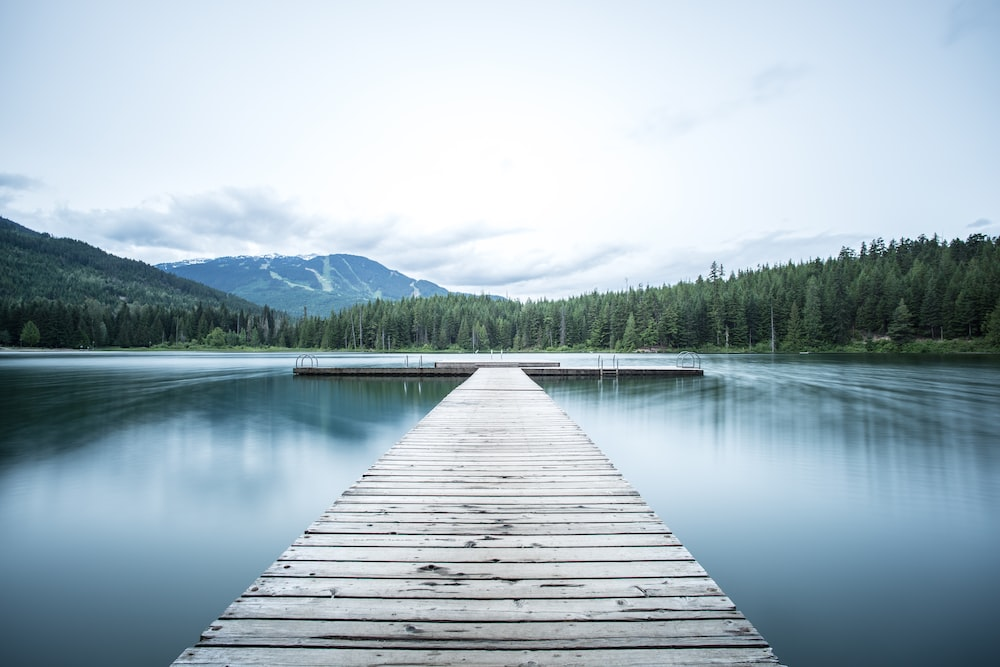

In [ ]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

## Preparing the quantization config to load the model in 4bit precision

In order to load the model in 4-bit precision, we need to pass a `quantization_config` to our model. Let's do that in the cells below

In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

## Load the model using `pipeline`

We will leverage the `image-to-text` pipeline from transformers !

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

It is important to prompt the model wth a specific format, which is:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nDescribe the image to me?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
Describe the image to me?
ASSISTANT: The image features a wooden pier extending out over a body of water. The pier is situated in a serene, natural setting, surrounded by trees. The pier is long and appears to be well-maintained.

There are several people scattered around the pier, enjoying the view and the atmosphere. Some of them are closer to the water's edge, while others are further back on the pier. The overall scene is peaceful and inviting, with the pier serving as a focal point for relaxation and leisure.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

USER:  
Describe the image to me?
ASSISTANT: The image depicts a woman lying on a massage table, receiving a relaxing massage. Another person is present in the scene, possibly assisting or observing the massage. The woman appears to be enjoying the massage, as she is comfortably lying on the table.

The room features a chair and a vase, adding to the cozy atmosphere. The woman's hair is styled in a ponytail, and she is wearing a brown outfit. The overall scene conveys a sense of relaxation and well-being.


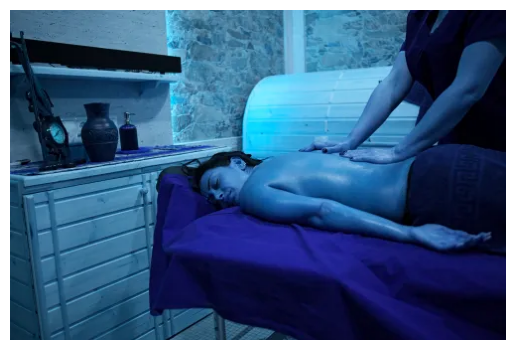

USER:  
Describe the image to me?
ASSISTANT: The image features a man and a woman standing close to each other, with the man putting his finger under the woman's nose. They appear to be enjoying a playful moment together.

In the background, there are several bowls and a spoon, suggesting that they might be in a kitchen or dining area. The bowls are placed at various positions, while the spoon is located near the center of the scene.


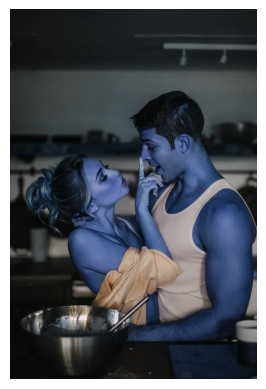

USER:  
Describe the image to me?
ASSISTANT: The image features a woman giving a massage to a man who is lying on a massage table. The woman is positioned on the right side of the man, providing a soothing and relaxing experience. The man appears to be enjoying the massage, as he is lying down comfortably.

In the background, there are two potted plants, one on the left side and the other on the right side of the scene. The room also has a chair placed near the left side of the image.


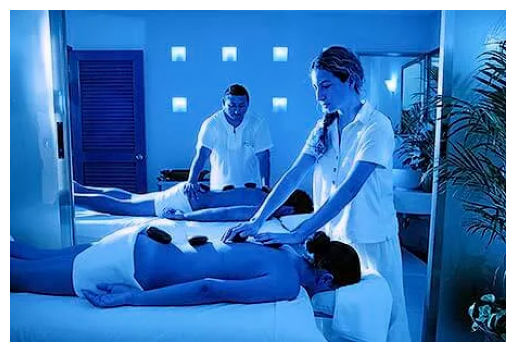

USER:  
Describe the image to me?
ASSISTANT: The image features a group of naked women sitting on a wooden bench. They are all sitting close to each other, with some of them appearing to be in a relaxed and comfortable position. The women are positioned in various ways, with some sitting straight and others leaning back or sitting on their sides. The scene appears to be a casual and intimate gathering of friends or family members.


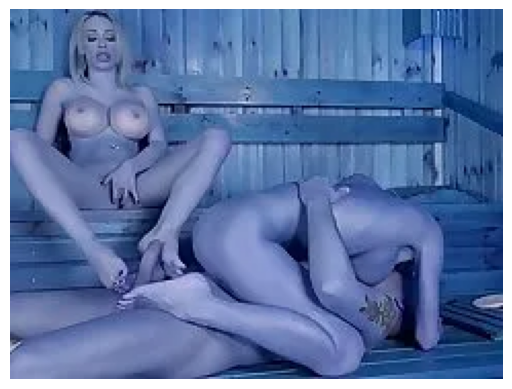

USER:  
Describe the image to me?
ASSISTANT: The image features a beautiful young woman with large breasts, standing in front of a window. She is wearing a bra and appears to be looking at the camera. The woman's breasts are clearly visible, and she is posing confidently for the picture.


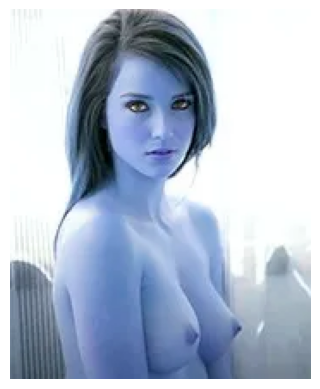

USER:  
Describe the image to me?
ASSISTANT: The image features a man and a woman standing close to each other, with their faces pressed together. They appear to be enjoying a tender moment, possibly kissing or embracing. The man is wearing an orange shirt, and the woman is wearing a white shirt. The scene is set in a park, with a beautiful sunset in the background, creating a serene and romantic atmosphere.


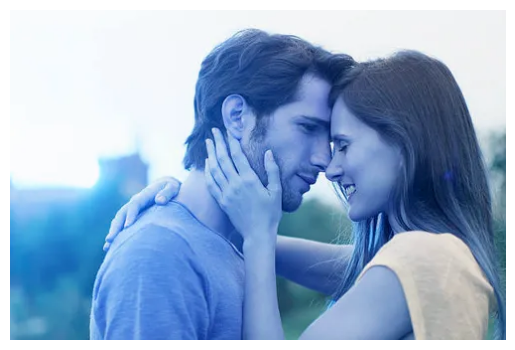

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


USER:  
Describe the image to me?
ASSISTANT: The image features a woman lying on a bed, with her legs spread open. A man is standing next to her, and he is holding a large black dildo. The woman appears to be enjoying the experience, as she is spreading her legs wider to accommodate the dildo. The scene is quite explicit and captures the intimate moment between the two individuals.


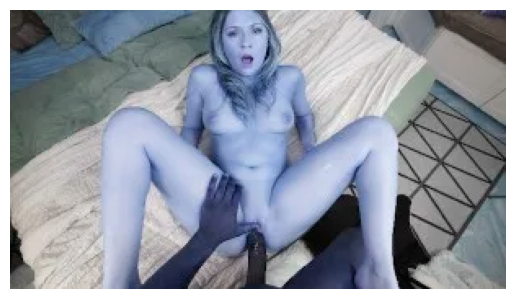

USER:  
Describe the image to me?
ASSISTANT: The image features a man lying on a massage table, receiving a massage from a woman. The woman is skillfully working on the man's back, providing him with a relaxing and therapeutic experience. The scene takes place in a room with a chair and a dining table visible in the background.


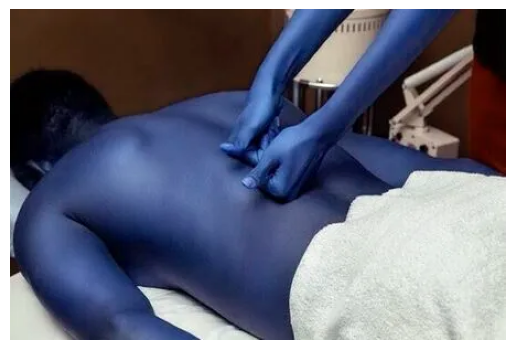

USER:  
Describe the image to me?
ASSISTANT: The image features a collection of various vibrators and dildos, all placed on a red background. There are at least six vibrators and dildos in the scene, each with different shapes and sizes. Some of the vibrators are placed closer to the foreground, while others are positioned further back in the scene. The arrangement of these items creates an eye-catching and visually appealing display.


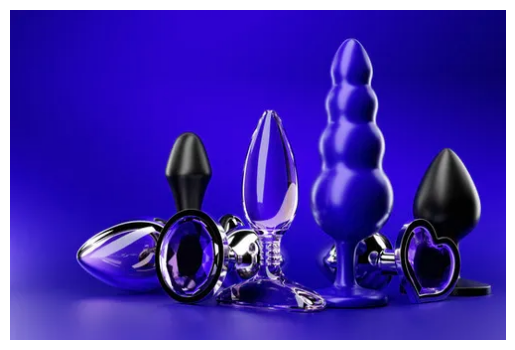

USER:  
Describe the image to me?
ASSISTANT: The image features a pink and blue box with a vibrator inside. The vibrator is placed in the center of the box, and it appears to be a toy designed for backside play. The box is open, revealing the vibrator and its unique design.


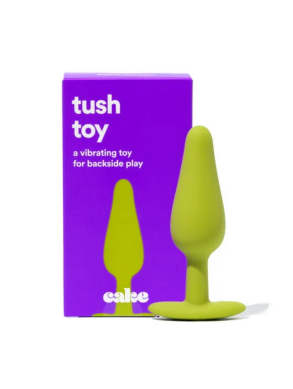

USER:  
Describe the image to me?
ASSISTANT: The image features a man and a woman lying on a bed, engaging in a passionate moment. The man is on top of the woman, and they appear to be kissing or making out. The woman is wearing a necklace, adding to the intimate atmosphere of the scene. The bed occupies most of the image, with the couple positioned towards the center.


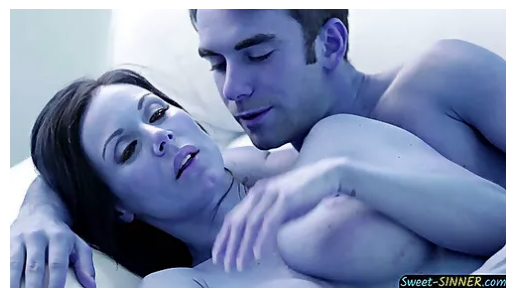

USER:  
Describe the image to me?
ASSISTANT: The image depicts a man and a woman lying on a couch, with the woman on top of the man. They are both kissing each other, creating a tender and intimate moment. The woman is positioned on the left side of the man, while the man is on the right side. The couch they are lying on spans the entire width of the image.


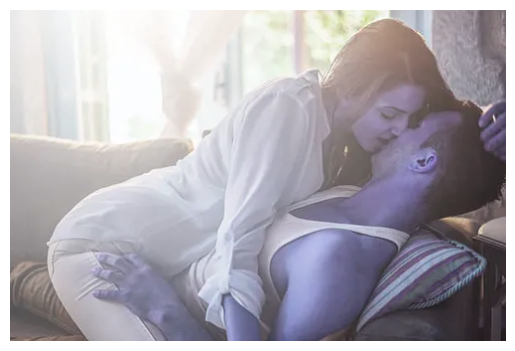

In [ ]:
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/HRM Notebooks/images 1/'

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.webp'):  # Check if file is an image
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        # Convert OpenCV image to PIL image
        image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        outputs = pipe(image_pil, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
        print(outputs[0]["generated_text"])
        plt.imshow(image)
        plt.axis('off')
        plt.show()


USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 3.3%.


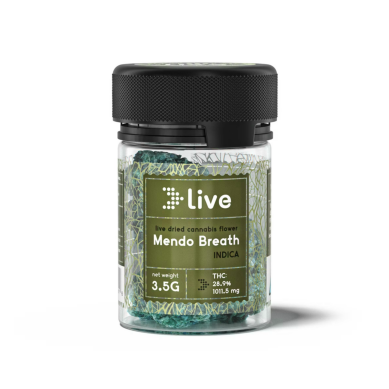

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 25%.


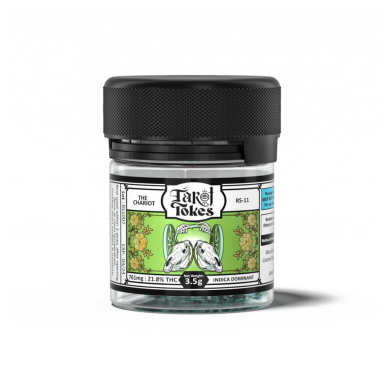

USER:  
What is the THC content?
ASSISTANT: The THC content of the cannabis flower in the jar is 3.3%.


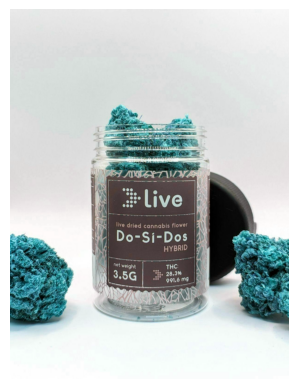

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 20%.


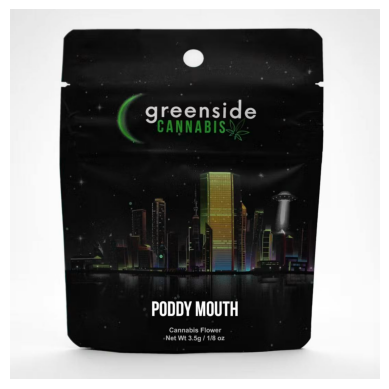

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 85%.


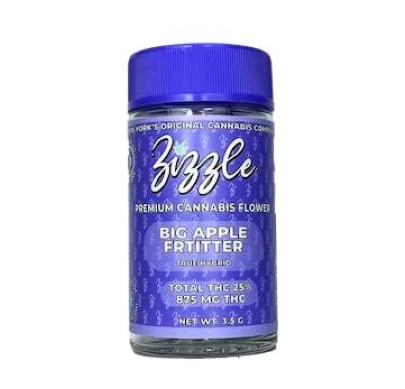

USER:  
What is the THC content?
ASSISTANT: The THC content of the Rainbow Belts is 28.98%.


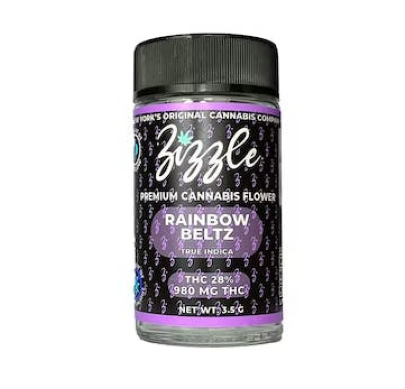

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 0.3%.


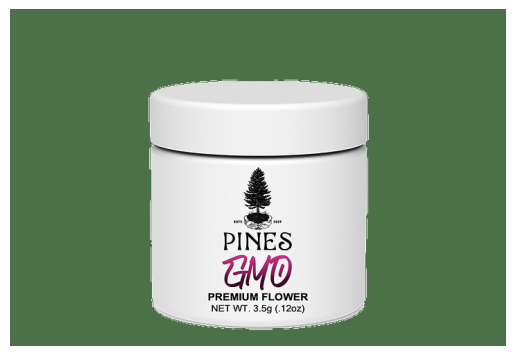

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 0.3%.


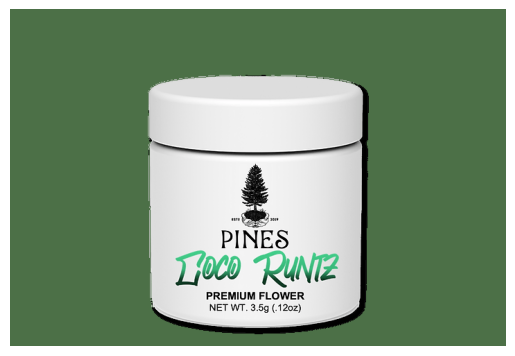

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 45%.


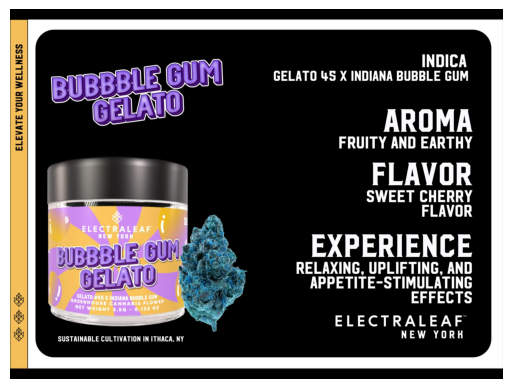

USER:  
What is the THC content?
ASSISTANT: The THC content of the product is 3.9%.


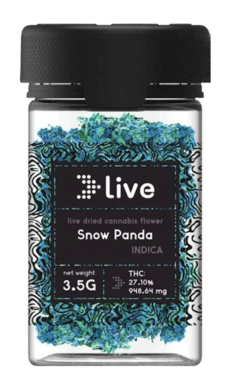

In [ ]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat is the THC content?\nASSISTANT:"

import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/HRM Notebooks/images/'

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.jfif')):  # Check if file is an image
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        # Convert OpenCV image to PIL image
        image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        outputs = pipe(image_pil, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
        print(outputs[0]["generated_text"])
        plt.imshow(image)
        plt.axis('off')
        plt.show()
